## HOUSE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [3]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [4]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [5]:
df.head(7)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5


In [6]:
df[["CITY", "STATE"]] = df["ADDRESS"].str.split(",", n=1, expand=True)

df = df.drop(columns=["ADDRESS"])

In [7]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,STATE
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,New Town,Kolkata


In [8]:
df.shape

(29451, 13)

In [9]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
CITY                      object
STATE                     object
dtype: object

In [10]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
CITY                     0
STATE                    0
dtype: int64

In [11]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [12]:
df.nlargest(n=5, columns='TARGET(PRICE_IN_LACS)')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,STATE
11238,Dealer,0,0,3,BHK,1.875000e+08,1,1,13.018900,77.596300,30000.0,R.T. Nagar,Bangalore
10745,Owner,0,0,3,BHK,2.545455e+08,1,1,13.021000,77.938000,28000.0,Malur,Bangalore
15724,Owner,0,0,2,BHK,8.064516e+07,1,1,12.795926,77.331535,25000.0,Lakkasandra,Bangalore
5967,Dealer,1,1,2,BHK,5.422570e+04,0,0,19.180000,72.963330,9990.0,Thane West,Lalitpur
10637,Dealer,1,1,3,BHK,8.322835e+04,0,0,18.627000,73.782900,9910.0,Chinchwad,Pune


C:\Users\parsh\AppData\Local\Temp\ipykernel_19124\3930924279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


<Axes: >

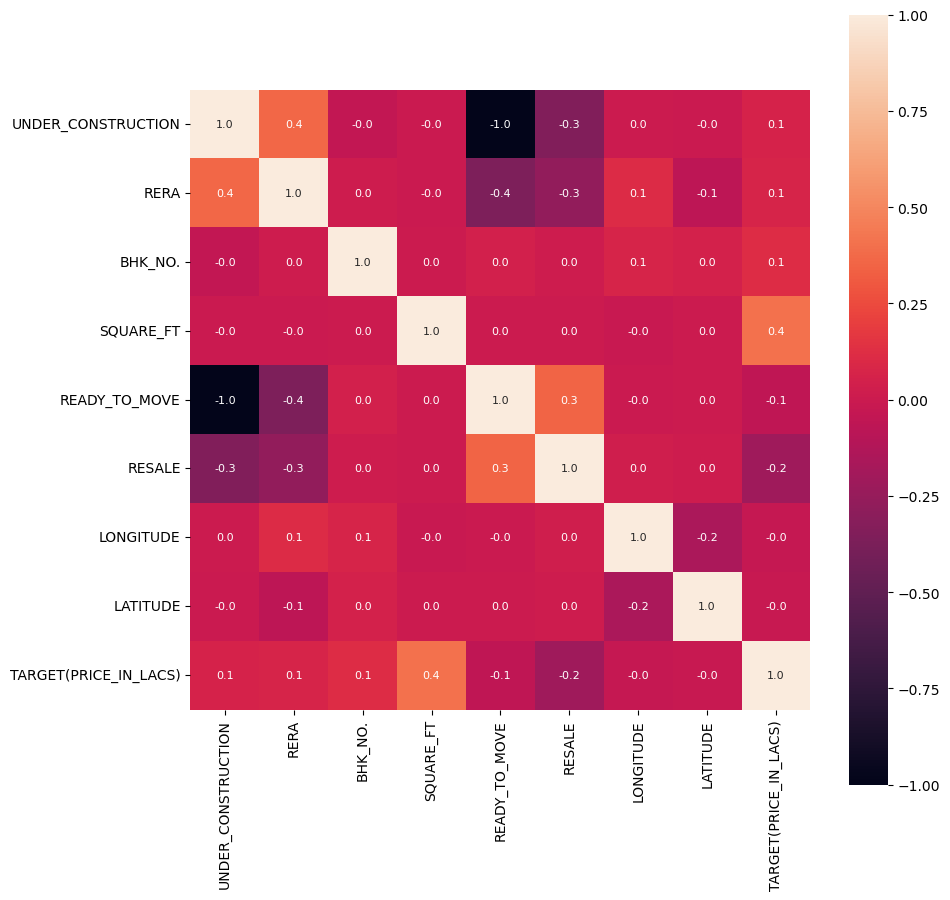

In [13]:
correlation =df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8})

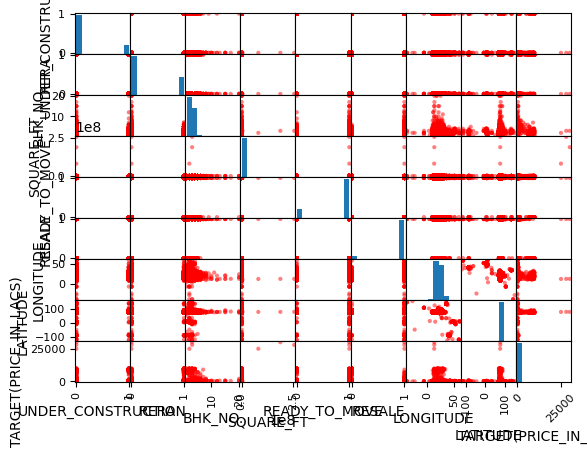

In [14]:
pd.plotting.scatter_matrix(df,color="red")
plt.figsize =(50,24)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

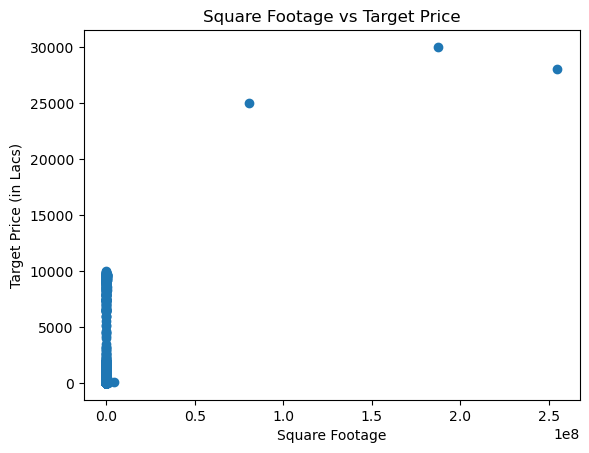

In [15]:
plt.scatter(df["SQUARE_FT"], df["TARGET(PRICE_IN_LACS)"])
plt.xlabel("Square Footage")
plt.ylabel("Target Price (in Lacs)")
plt.title("Square Footage vs Target Price")
plt.show()

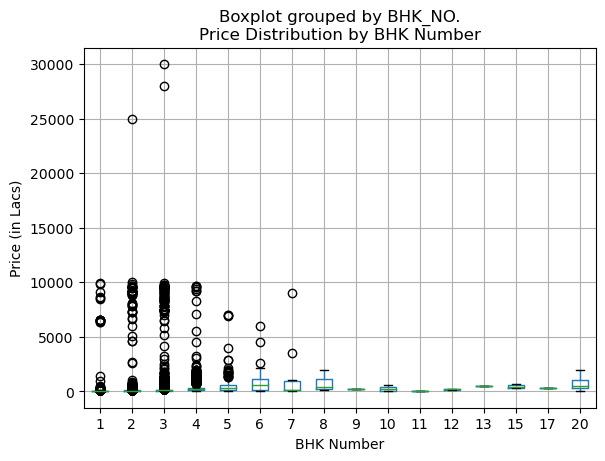

In [16]:
df.boxplot(column='TARGET(PRICE_IN_LACS)', by='BHK_NO.')
plt.title('Price Distribution by BHK Number')
plt.xlabel('BHK Number')
plt.ylabel('Price (in Lacs)')
plt.show()

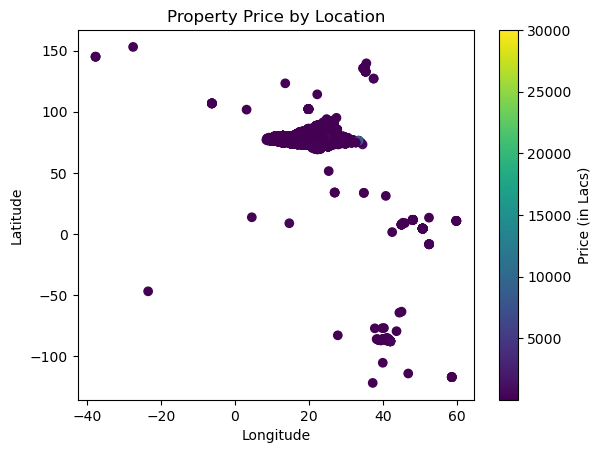

In [17]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['TARGET(PRICE_IN_LACS)'])
plt.title('Property Price by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price (in Lacs)')
plt.show()

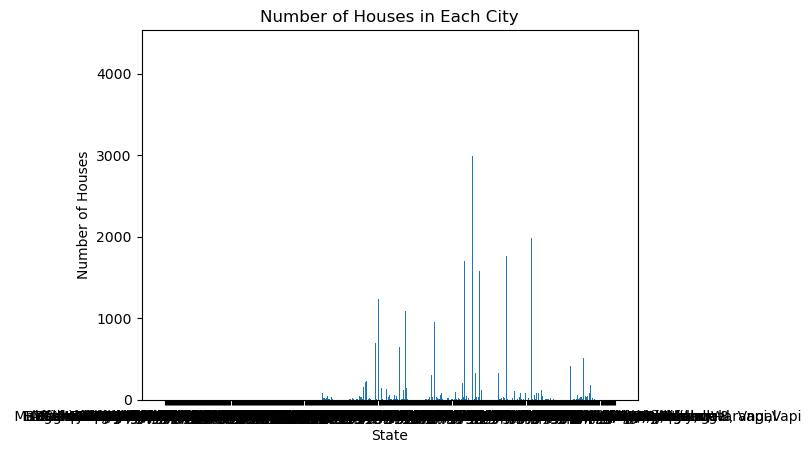

In [18]:
city_counts = df.groupby("STATE")["STATE"].count()
plt.bar(city_counts.index, city_counts.values)
plt.xlabel("State")
plt.ylabel("Number of Houses")
plt.title("Number of Houses in Each City")
plt.show()

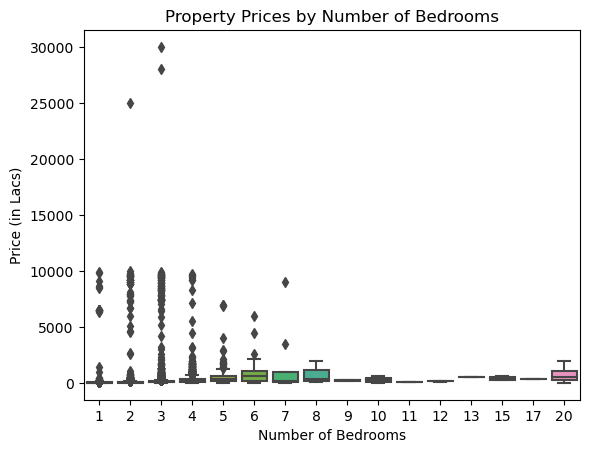

In [19]:
sns.boxplot(x='BHK_NO.', y='TARGET(PRICE_IN_LACS)', data=df)
plt.title('Property Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in Lacs)')
plt.show()

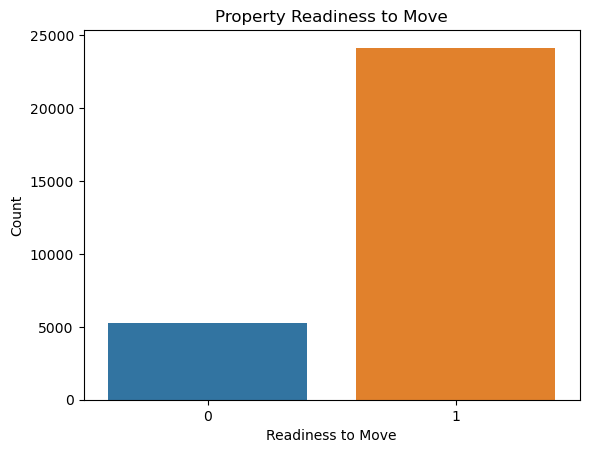

In [20]:
sns.countplot(x='READY_TO_MOVE', data=df)
plt.title('Property Readiness to Move')
plt.xlabel('Readiness to Move')
plt.ylabel('Count')
plt.show()

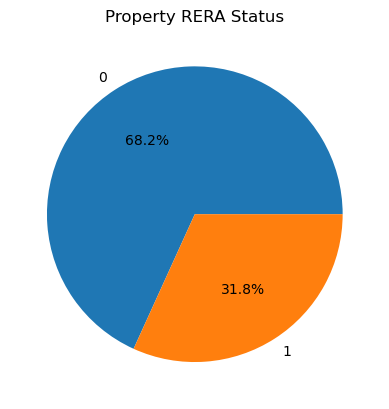

In [21]:
counts = df['RERA'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Property RERA Status')
plt.show()

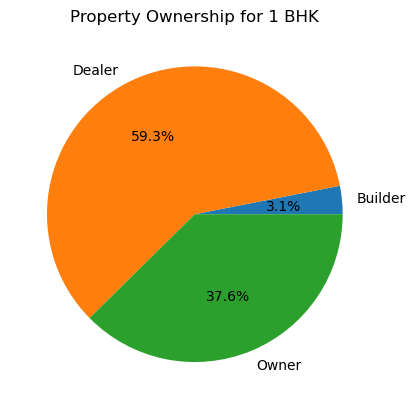

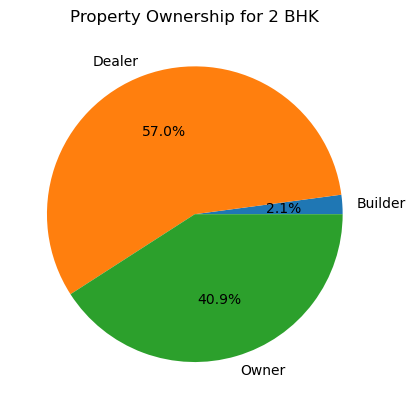

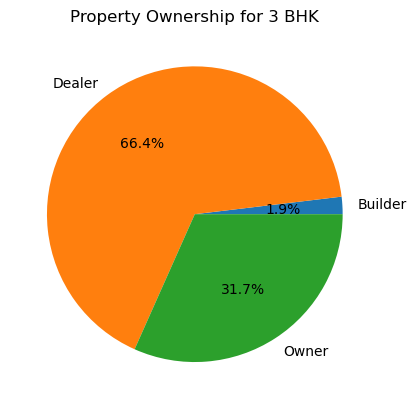

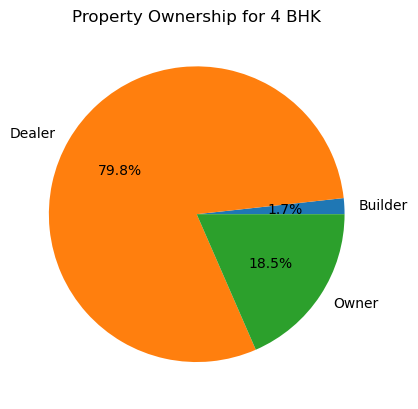

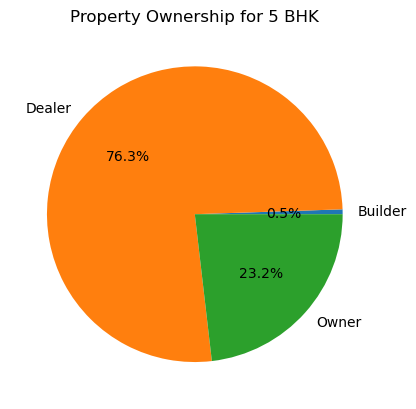

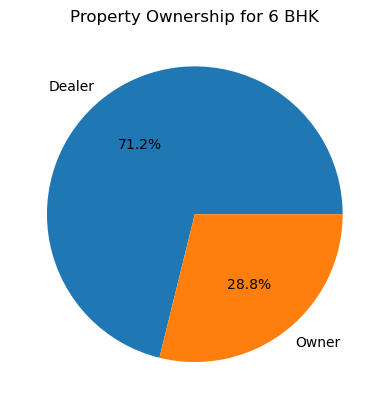

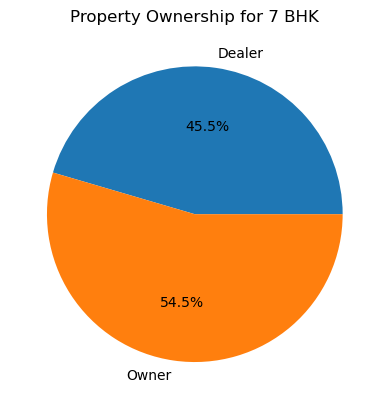

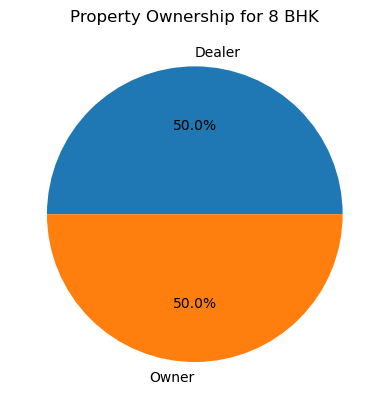

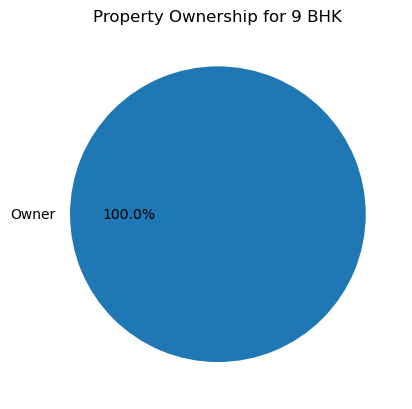

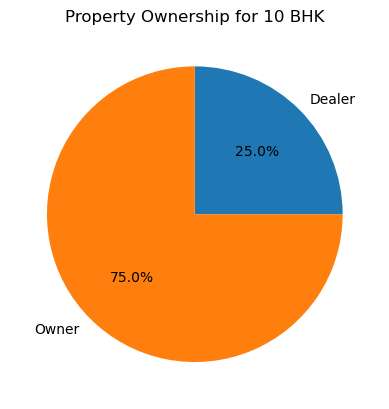

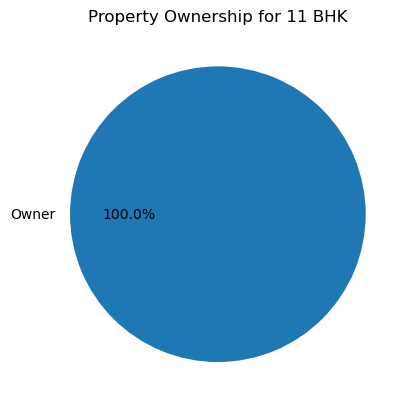

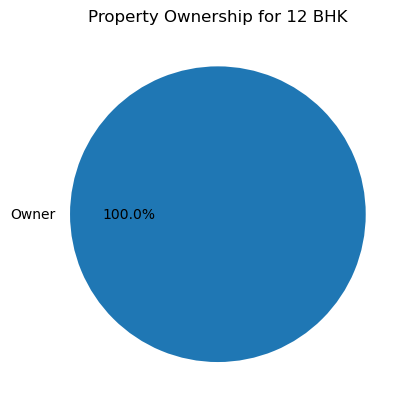

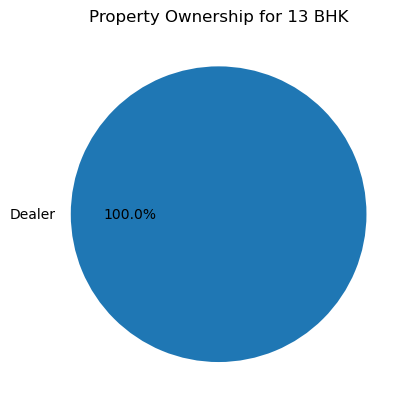

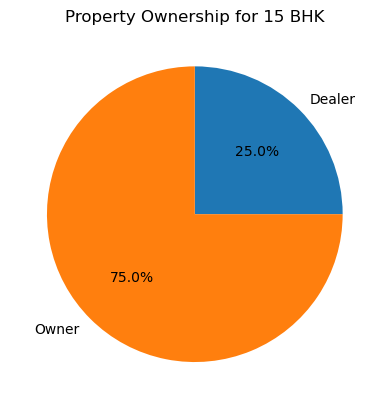

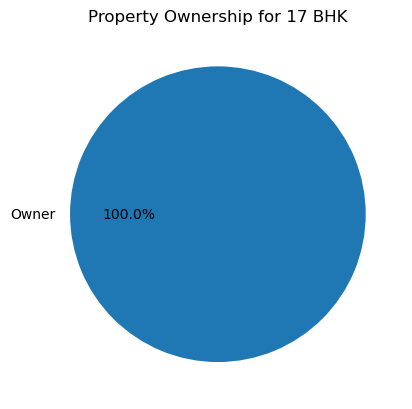

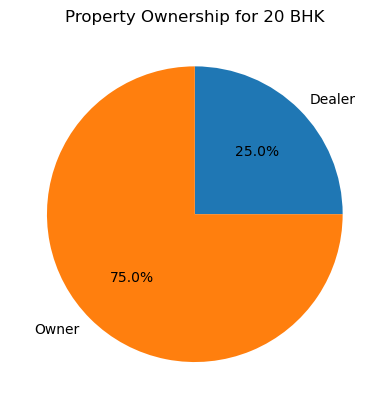

In [22]:
grouped = df.groupby(['BHK_NO.', 'POSTED_BY'])
counts = grouped.size()
for bhk in counts.index.levels[0]:
    bhk_counts = counts.loc[bhk]
    plt.figure()
    plt.pie(bhk_counts, labels=bhk_counts.index, autopct='%1.1f%%')
    plt.title(f'Property Ownership for {bhk} BHK')
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

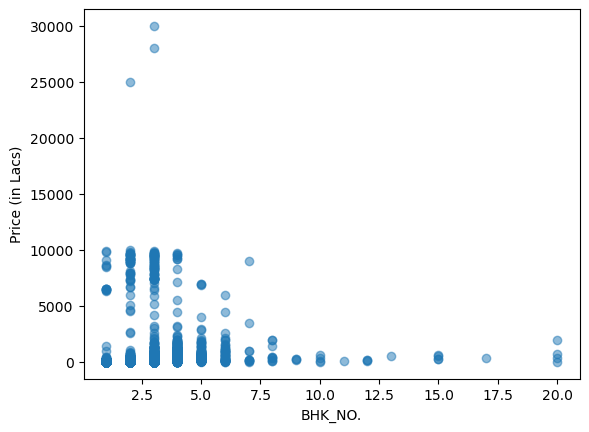

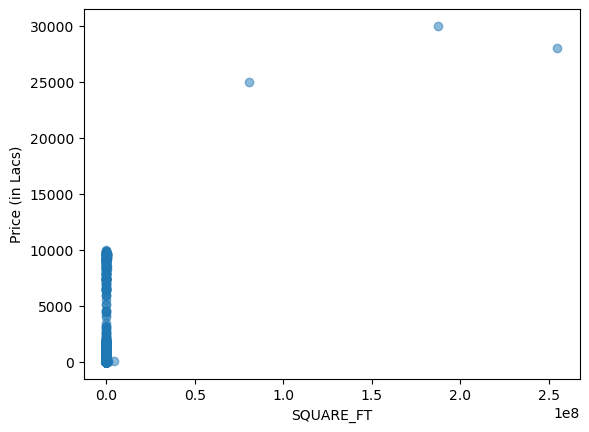

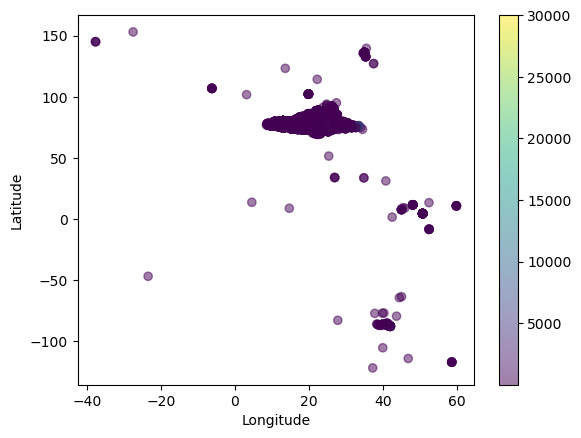

In [24]:
df = pd.read_csv('Train.csv')

plt.scatter(df['BHK_NO.'], df['TARGET(PRICE_IN_LACS)'], alpha=0.5)
plt.xlabel('BHK_NO.')
plt.ylabel('Price (in Lacs)')
plt.show()

plt.scatter(df['SQUARE_FT'], df['TARGET(PRICE_IN_LACS)'], alpha=0.5)
plt.xlabel('SQUARE_FT')
plt.ylabel('Price (in Lacs)')
plt.show()

plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['TARGET(PRICE_IN_LACS)'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

X_train = train_df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y_train = train_df['TARGET(PRICE_IN_LACS)']

In [27]:
X_train = pd.get_dummies(X_train, columns=['POSTED_BY', 'BHK_OR_RK'])
X_train.drop(['ADDRESS'], axis=1, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']] = scaler.fit_transform(X_train[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']])

X_test = pd.get_dummies(test_df, columns=['POSTED_BY', 'BHK_OR_RK'])
X_test.drop(['ADDRESS'], axis=1, inplace=True)
X_test[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']] = scaler.transform(X_test[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']])

In [28]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

pred_df = pd.DataFrame({'TARGET(PRICE_IN_LACS)': y_pred})
pred_df.to_csv('predictions.csv', index=False)


In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Training set:
Mean Squared Error: 400715.4590276562
Validation set:
Mean Squared Error: 542997.3502670402


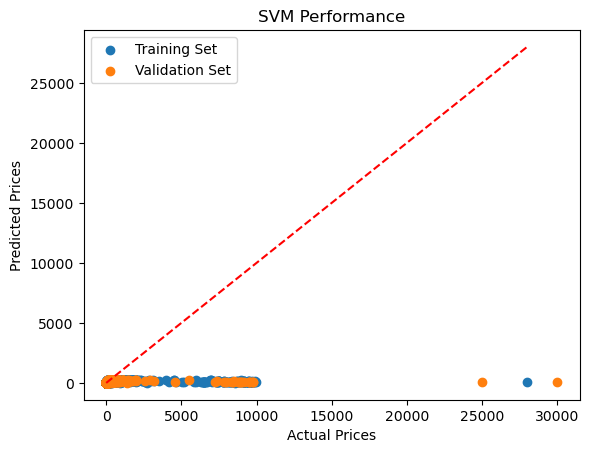

In [30]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

X_train = train_df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y_train = train_df['TARGET(PRICE_IN_LACS)']

X_train = pd.get_dummies(X_train, columns=['POSTED_BY', 'BHK_OR_RK'])
X_train.drop(['ADDRESS'], axis=1, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']] = scaler.fit_transform(X_train[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']])

X_test = pd.get_dummies(test_df, columns=['POSTED_BY', 'BHK_OR_RK'])
X_test.drop(['ADDRESS'], axis=1, inplace=True)
X_test[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']] = scaler.transform(X_test[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Training set:")
print("Mean Squared Error:", train_mse)

print("Validation set:")
print("Mean Squared Error:", val_mse)

fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, label="Training Set")
ax.scatter(y_val, y_val_pred, label="Validation Set")
ax.plot([0, max(y_train)], [0, max(y_train)], 'r--')
ax.set_xlabel("Actual Prices")
ax.set_ylabel("Predicted Prices")
ax.set_title("SVM Performance")
ax.legend()
plt.show()

In [31]:
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Training set:")
print("R2 Score:", train_r2)
print("Validation set:")
print("R2 Score:", val_r2)

Training set:
R2 Score: 0.005974391887817232
Validation set:
R2 Score: 0.003431601095857828


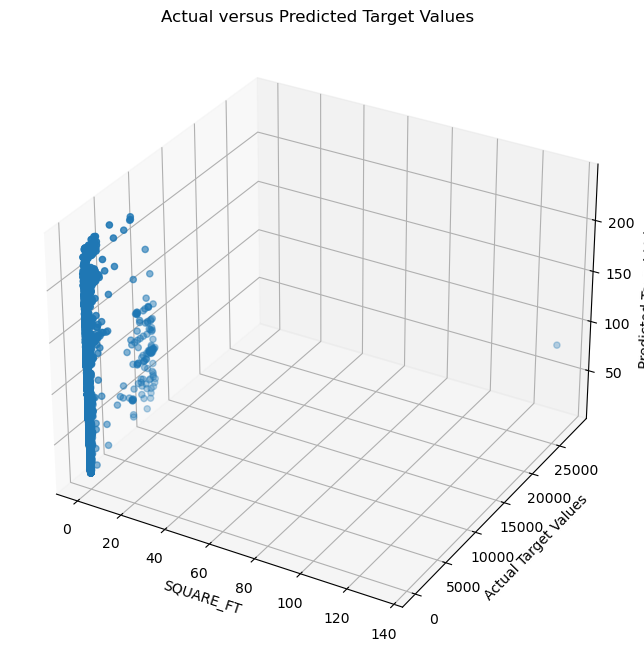

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm, X_train, y_train, cv=5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['SQUARE_FT'], y_train, y_train_pred)
ax.set_xlabel('SQUARE_FT')
ax.set_ylabel('Actual Target Values')
ax.set_zlabel('Predicted Target Values')
ax.set_title('Actual versus Predicted Target Values')
plt.show()